# Part II Project Notebook

## NMA Exploration in ProDy

In [1]:
%pip install prody
%pip install matplotlib.pylab


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pylab (from versions: none)
ERROR: No matching distribution found for matplotlib.pylab


### Parse Structure

In [5]:
from prody import *

from matplotlib.pylab import *

ion()

C:\Users\Mihailo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [6]:
ubi = parsePDB('1aar')

ubi

@> PDB file is found in working directory (1aar.pdb).
@> 1218 atoms and 1 coordinate set(s) were parsed in 0.04s.


<AtomGroup: 1aar (1218 atoms)>

In [7]:
calphas = ubi.select('calpha and chain A and resnum < 71')

calphas

<Selection: 'calpha and chai...and resnum < 71' from 1aar (70 atoms)>

In [5]:
gnm = GNM(name = 'Ubiquintin')

### Build Kirchhoff matrix

In [6]:
gnm.buildKirchhoff(coords=calphas, cutoff=10.0, gamma=1.0)

@> Kirchhoff was built in 0.00s.


In [7]:
gnm.getKirchhoff()

array([[11., -1., -1., ...,  0.,  0.,  0.],
       [-1., 15., -1., ...,  0.,  0.,  0.],
       [-1., -1., 20., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 20., -1., -1.],
       [ 0.,  0.,  0., ..., -1., 21., -1.],
       [ 0.,  0.,  0., ..., -1., -1., 12.]])

### Parameters

In [8]:
gnm.getCutoff()

10.0

In [9]:
gnm.getGamma()

1.0

### Calculate Normal Modes

In [10]:
gnm.calcModes(20, zeros=False)

@> 20 modes were calculated in 0.02s.


### Normal Mode Data

In [11]:
gnm.getEigvals().round(3)

array([ 2.502,  2.812,  4.366,  5.05 ,  7.184,  7.65 ,  7.877,  9.08 ,
        9.713, 10.132, 10.502, 10.644, 10.888, 11.157, 11.285, 11.632,
       11.78 , 11.936, 12.006, 12.218])

In [12]:
gnm.getEigvecs().round(3)

array([[-0.064, -0.131, -0.245, ..., -0.256,  0.538, -0.   ],
       [-0.073, -0.085, -0.19 , ...,  0.006, -0.069,  0.032],
       [-0.076, -0.043, -0.135, ...,  0.017, -0.047,  0.018],
       ...,
       [-0.092,  0.064,  0.105, ...,  0.032, -0.042,  0.006],
       [-0.07 ,  0.099,  0.054, ...,  0.031,  0.024, -0.014],
       [-0.081,  0.135,  0.124, ...,  0.013, -0.04 , -0.018]])

### NMA on CPU using GNM Function

In [13]:
def calculate_modes_gnm_cpu(protein_name, cutoff = 7.0, num_modes=20, gamma = 1):
    """
    Function to calculate normal modes on CPU

    Arguments:  
        protein_name : string - PDB id of a protein
        cutoff : double - cutoff distance for GNM algorithm
        num_modes : integer - number of lowest non-trivial modes calculated
        gamma : double - constant for potential energy calculation
    Outputs:
        (eigenvals, eigenvecs) : (array(double), array(array(double))) - calculated modes and eigenvalues 
    """
    protein = parsePDB(protein_name)
    calphas = protein.select('calpha')

    gnm = GNM()
    gnm.buildKirchhoff(coords=calphas, cutoff=cutoff, gamma=gamma)

    gnm.calcModes(num_modes, zeros=False)
    return (gnm.getEigvals(), gnm.getEigvecs())

In [14]:
calculate_modes_gnm_cpu(protein_name = '1aar', cutoff = 7.0, num_modes = 20, gamma = 1.0)

@> PDB file is found in working directory (1aar.pdb.gz).
@> 1218 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Kirchhoff was built in 0.01s.
@> 20 modes were calculated in 0.04s.


(array([0.14151754, 0.38104426, 0.46836206, 0.49593759, 0.58382043,
        0.74431723, 0.99646697, 1.28180999, 1.56646564, 1.67868394,
        1.95557404, 2.0090235 , 2.03833678, 2.22876991, 2.36152138,
        2.5340486 , 2.7414319 , 2.82949063, 3.48699585, 3.54410935]),
 array([[ 1.03374384e-01, -9.82880493e-03,  9.08562012e-02, ...,
          8.70083494e-03, -2.02469425e-02,  6.72316938e-02],
        [ 9.30774820e-02, -3.26144808e-03,  1.15694755e-01, ...,
         -5.83068367e-02,  3.15810145e-02, -7.94458795e-02],
        [ 8.71730373e-02, -5.12303779e-04,  1.16869498e-01, ...,
         -6.31150849e-02,  1.62240898e-02, -4.83183478e-02],
        ...,
        [-3.87764509e-02,  2.74922729e-01, -2.03643722e-02, ...,
         -6.47737074e-02, -1.81914991e-03,  9.33410435e-03],
        [-4.38281298e-02,  4.51078770e-01, -4.61927640e-02, ...,
         -6.18272501e-02, -2.15825057e-02,  5.86602243e-02],
        [-5.10530291e-02,  7.28773875e-01, -8.68876360e-02, ...,
          3.379478

### NMA on CPU using ANM Function

In [15]:
def calculate_modes_anm_cpu(protein_name, cutoff = 7.0, num_modes=20, gamma = 1):
    """
    Function to calculate normal modes on CPU

    Arguments:  
        protein_name : string - PDB id of a protein
        cutoff : double - cutoff distance for GNM algorithm
        num_modes : integer - number of lowest non-trivial modes calculated
        gamma : double - constant for potential energy calculation
    Outputs:
        (eigenvals, eigenvecs) : (array(double), array(array(double))) - calculated modes and eigenvalues 
    """
    protein = parsePDB(protein_name)
    calphas = protein.select('calpha')

    anm = ANM()
    anm.buildHessian(coords=calphas, cutoff=cutoff, gamma=gamma)

    anm.calcModes(num_modes, zeros=False)
    return (anm.getEigvals(), anm.getEigvecs())

In [16]:
calculate_modes_anm_cpu(protein_name = '1aar', cutoff = 7.0, num_modes = 20, gamma = 1.0)

@> PDB file is found in working directory (1aar.pdb.gz).
@> 1218 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Hessian was built in 0.02s.
@> WARNING More than 6 (10) zero eigenvalues were calculated.
@> Solving for additional eigenvalues...
@> 20 modes were calculated in 0.27s.


(array([0.0017942 , 0.00300006, 0.00326869, 0.00360493, 0.00454109,
        0.00492944, 0.00664014, 0.0084666 , 0.01088321, 0.01172248,
        0.01297695, 0.01378273, 0.01509764, 0.01721543, 0.02058993,
        0.02542463, 0.02643672, 0.02694707, 0.02960575, 0.03364039]),
 array([[-6.54433343e-02, -9.30086589e-02, -2.51089450e-02, ...,
         -5.42175871e-02,  6.05319190e-02, -4.20373223e-02],
        [-4.07659821e-02, -5.58569414e-02, -6.05755436e-02, ...,
         -2.92361728e-02,  2.20959283e-02,  3.91366217e-02],
        [ 1.19016883e-02,  6.49503151e-03,  4.29543346e-02, ...,
         -5.15058144e-02, -2.73614983e-02,  1.43220817e-02],
        ...,
        [ 5.95375806e-03,  4.61585294e-02,  2.52558110e-02, ...,
          3.54890740e-02, -4.68533288e-02,  3.35423351e-02],
        [ 4.40669378e-04,  3.41643887e-03,  1.86931723e-03, ...,
          2.62673559e-03, -3.46786467e-03,  2.48264706e-03],
        [ 9.60029717e-05,  7.44295610e-04,  4.07244111e-04, ...,
          5.722531

## NMA Exploration in Springcraft

In [17]:
%pip install springcraft
%pip install matplotlib.pylab


     ---------------------------------------- 46.9/46.9 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 30.9/30.9 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 42.9 MB/s eta 0:00:00
     ---------------------------------------- 62.5/62.5 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pylab (from versions: none)
ERROR: No matching distribution found for matplotlib.pylab


### Usage

In [5]:
import biotite.structure.io as strucio
import springcraft

# All pairs of atoms within a cutoff distance obtain the same force constant
ff = springcraft.InvariantForceField(cutoff_distance=13.0)

# The force constant is inversely proportional to the squared distance
ff = springcraft.ParameterFreeForceField()

# The force constant is read from tabulated values
# based on residue types and distance
# For the residue type the underlying CA-trace is required
atoms = strucio.load_structure("1aar.pdb")
atoms = atoms[(atoms.atom_name == "CA") & (atoms.element == "C")]
ff = springcraft.TabulatedForceField.sd_enm(atoms)

In [6]:
atoms

array([
	Atom(np.array([14.6  , 29.031, 15.11 ], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="MET", hetero=False, atom_name="CA", element="C"),
	Atom(np.array([15.552, 25.806, 16.852], dtype=float32), chain_id="A", res_id=2, ins_code="", res_name="GLN", hetero=False, atom_name="CA", element="C"),
	Atom(np.array([15.593, 22.437, 15.13 ], dtype=float32), chain_id="A", res_id=3, ins_code="", res_name="ILE", hetero=False, atom_name="CA", element="C"),
	Atom(np.array([16.773, 19.057, 16.52 ], dtype=float32), chain_id="A", res_id=4, ins_code="", res_name="PHE", hetero=False, atom_name="CA", element="C"),
	Atom(np.array([18.917, 16.876, 14.225], dtype=float32), chain_id="A", res_id=5, ins_code="", res_name="VAL", hetero=False, atom_name="CA", element="C"),
	Atom(np.array([18.713, 13.283, 15.533], dtype=float32), chain_id="A", res_id=6, ins_code="", res_name="LYS", hetero=False, atom_name="CA", element="C"),
	Atom(np.array([21.128, 10.538, 14.58 ], dtype=float32), chain_id="A

In [8]:
ff = springcraft.InvariantForceField(cutoff_distance=13.0)
hessian, pairs = springcraft.compute_hessian(atoms.coord, ff)

In [9]:
hessian

array([[ 5.19572309, -0.34421606, -0.0350209 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.34421606,  8.76178573,  0.51959594, ...,  0.        ,
         0.        ,  0.        ],
       [-0.0350209 ,  0.51959594,  7.04249102, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  3.52643149,
        -0.73890825,  1.49009654],
       [ 0.        ,  0.        ,  0.        , ..., -0.73890825,
         0.53402977, -0.55103007],
       [ 0.        ,  0.        ,  0.        , ...,  1.49009654,
        -0.55103007,  0.93953867]])

In [10]:
pairs

array([[  0,   1],
       [  0,   2],
       [  0,   3],
       ...,
       [151, 148],
       [151, 149],
       [151, 150]], dtype=int64)

In [11]:
gnm = springcraft.GNM(atoms, ff)
eigen_values, eigen_vectors = gnm.eigen()

In [12]:
eigen_values

array([-1.21665267e-15,  2.84135732e+00,  4.29765108e+00,  8.35940261e+00,
        9.48532265e+00,  1.05240745e+01,  1.17240771e+01,  1.21365245e+01,
        1.28147766e+01,  1.41107873e+01,  1.51027112e+01,  1.55277972e+01,
        1.69308823e+01,  1.70848687e+01,  1.80506771e+01,  1.82877559e+01,
        1.86935126e+01,  1.91675102e+01,  1.97725436e+01,  1.99266013e+01,
        2.02584425e+01,  2.08339435e+01,  2.10163595e+01,  2.11699105e+01,
        2.15389438e+01,  2.18151891e+01,  2.19239768e+01,  2.20965495e+01,
        2.23183128e+01,  2.26563713e+01,  2.30817631e+01,  2.33308151e+01,
        2.37202350e+01,  2.37856658e+01,  2.39922518e+01,  2.41018928e+01,
        2.43523524e+01,  2.44587724e+01,  2.47671547e+01,  2.48917813e+01,
        2.51114926e+01,  2.52159804e+01,  2.55650902e+01,  2.56368734e+01,
        2.57771421e+01,  2.58632052e+01,  2.59859429e+01,  2.60447189e+01,
        2.62336962e+01,  2.63392437e+01,  2.65287343e+01,  2.65512311e+01,
        2.65665197e+01,  

In [13]:
eigen_vectors

array([[-8.11107106e-02, -8.11107106e-02, -8.11107106e-02, ...,
        -8.11107106e-02, -8.11107106e-02, -8.11107106e-02],
       [ 1.21579490e-01,  1.13061128e-01,  1.00338032e-01, ...,
        -1.47319652e-02, -5.02380064e-02, -6.55098749e-02],
       [-5.58565407e-03, -6.21635692e-03, -5.01464548e-03, ...,
         1.45423125e-01,  2.89936088e-01,  9.16666433e-01],
       ...,
       [ 4.53167774e-03,  9.31559255e-03, -2.96534888e-02, ...,
         4.16222408e-04, -2.00597487e-03, -1.03933251e-03],
       [-2.36460869e-03, -4.87282985e-03,  1.74470782e-02, ...,
        -4.42041372e-04,  2.48245490e-04, -1.79913304e-04],
       [ 2.69641539e-03,  4.78988867e-03, -2.18683537e-02, ...,
         5.92624616e-03,  2.73246538e-03,  7.11662242e-04]])

In [14]:
import numpy as np

anm = springcraft.ANM(atoms, ff)
force_vector = np.zeros((atoms.array_length(), 3))
force_vector[42, 0] = 10
displacements = anm.linear_response(force_vector)

### Springcraft Example

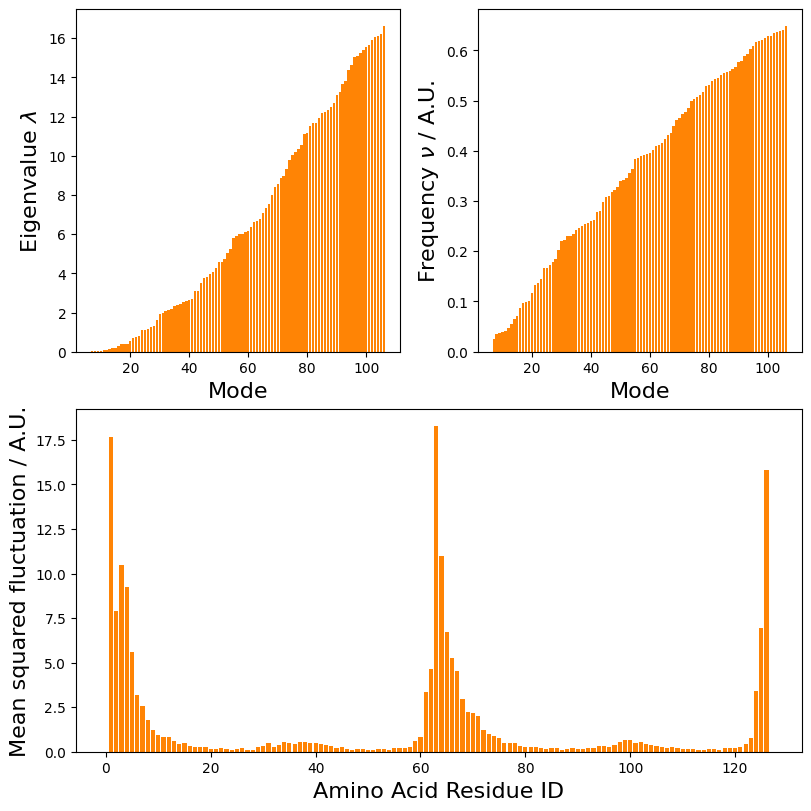

In [2]:
# Code source: Jan Krumbach
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import biotite
import biotite.structure as struc
import biotite.structure.io.mmtf as mmtf
import biotite.database.rcsb as rcsb
import springcraft


# Fetch G:T/U Mismatch-specific DNA glycosylase from E. coli
PDB_ID = "1A0A"
mmtf_file = mmtf.MMTFFile.read(rcsb.fetch(PDB_ID, "mmtf"))
whole_structure = mmtf.get_structure(mmtf_file, model=1, include_bonds=True)
protein = whole_structure[struc.filter_amino_acids(whole_structure)]
ca = protein[(protein.atom_name == "CA") & (protein.element == "C")]

# Select forcefield; create ANM object using the eANM forcefield
ff = springcraft.TabulatedForceField.e_anm(ca)
eanm = springcraft.ANM(ca, ff)

## NMA
# Compute eigenvalues and eigenvectors.
# The first 6 eigenvals./eigenvecs corresponding to trivial modes are omitted.
# -> analyse modes 7-107
eigenval, eigenvec = eanm.eigen()
eigenval = eigenval[6:106]
# Compute fluctuations for all residues and frequencies for modes 7-107
msqf = eanm.mean_square_fluctuation()
freq = eanm.frequencies()[6:106]

## Plot
fig = plt.figure(figsize=(8.0, 8.0), constrained_layout=True)
grid = fig.add_gridspec(nrows=2, ncols=2)

ax00 = fig.add_subplot(grid[0, 0])
ax01 = fig.add_subplot(grid[0, 1])
ax1 = fig.add_subplot(grid[1, :])

biotite_c = biotite.colors["orange"]

ax00.bar(x=np.arange(7, len(eigenval)+7), height=eigenval, color=biotite_c)
ax01.bar(x=np.arange(7, len(freq)+7), height=freq, color=biotite_c)
ax1.bar(x=np.arange(1, len(msqf)+1), height=msqf, color=biotite_c)

ax00.set_xlabel("Mode", size=16)
ax00.set_ylabel(r"Eigenvalue $\lambda$", size=16)
ax01.set_xlabel("Mode", size=16)
ax01.set_ylabel(r"Frequency $\nu$ / A.U.", size=16)
ax1.set_xlabel("Amino Acid Residue ID", size=16)
ax1.set_ylabel("Mean squared fluctuation / A.U.", size=16)

plt.show()

### Calculation of 3 Flexibility Measures Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import biotite
import biotite.structure as struc
import biotite.structure.io.mmtf as mmtf
import biotite.database.rcsb as rcsb
import biotite.structure.io as strucio
import springcraft

def calculate_normal_modes_gnm_from_file(path, cutoff):
    '''
    Function that calculates eigenvalues and eigenvectors of Kirchhoff matrix using GNM method from .pdb file.

    Arguments:
        path : string - Path to .pdb file containing structure we want to explore
        cutoff : double - Angstrom distance under which two CA atoms are represented as connected
    Returns:
        eigenvalues : array(double) - Eigenvalues of Kirchhoff matrix
        eigenvectors : matrix(double) - Eigenvectors of Kirchhoff matrix represented as rows of the matrix returned   
    '''

    # Read .pdb file and filter CA atoms
    whole_structure = strucio.load_structure(path)
    protein = whole_structure[struc.filter_amino_acids(whole_structure)]
    ca = protein[(protein.atom_name == "CA") & (protein.element == "C")]
    
    # Define force field and GNM object
    ff = springcraft.InvariantForceField(cutoff_distance=cutoff)
    gnm = springcraft.GNM(ca, ff)

    # Return model with all pre-processing
    return gnm

def calculate_normal_modes_gnm_from_id(id, cutoff):
    '''
    Function that calculates eigenvalues and eigenvectors of Kirchhoff matrix using GNM method from PDBID of a structure.

    Arguments:
        id : string - PDBID of a structure we want to explore
        cutoff : double - Angstrom distance under which two CA atoms are represented as connected
    Returns:
        eigenvalues : array(double) - Eigenvalues of Kirchhoff matrix
        eigenvectors : matrix(double) - Eigenvectors of Kirchhoff matrix represented as rows of the matrix returned   
    '''

    # Read .pdb file and filter CA atoms
    mmtf_file = mmtf.MMTFFile.read(rcsb.fetch(id, "mmtf"))
    whole_structure = mmtf.get_structure(mmtf_file, model=1, include_bonds=True)
    protein = whole_structure[struc.filter_amino_acids(whole_structure)]
    ca = protein[(protein.atom_name == "CA") & (protein.element == "C")]
    
    # Define force field and GNM object
    ff = springcraft.InvariantForceField(cutoff_distance=cutoff)
    gnm = springcraft.GNM(ca, ff)

    # Return model with all pre-processing
    return gnm    

def calculate_normal_modes_anm_from_file(path, cutoff):
    '''
    Function that calculates eigenvalues and eigenvectors of Kirchhoff matrix using ANM method from .pdb file.

    Arguments:
        path : string - Path to .pdb file containing structure we want to explore
        cutoff : double - Angstrom distance under which two CA atoms are represented as connected
    Returns:
        eigenvalues : array(double) - Eigenvalues of Kirchhoff matrix
        eigenvectors : matrix(double) - Eigenvectors of Kirchhoff matrix represented as rows of the matrix returned   
    '''

    # Read .pdb file and filter CA atoms
    whole_structure = strucio.load_structure(path)
    protein = whole_structure[struc.filter_amino_acids(whole_structure)]
    ca = protein[(protein.atom_name == "CA") & (protein.element == "C")]
    
    # Define force field and GNM object
    ff = springcraft.InvariantForceField(cutoff_distance=cutoff)
    anm = springcraft.ANM(ca, ff)

    # Return model with all pre-processing
    return anm

def calculate_normal_modes_anm_from_id(id, cutoff):
    '''
    Function that calculates eigenvalues and eigenvectors of Kirchhoff matrix using ANM method from PDBID of a structure.

    Arguments:
        id : string - PDBID of a structure we want to explore
        cutoff : double - Angstrom distance under which two CA atoms are represented as connected
    Returns:
        eigenvalues : array(double) - Eigenvalues of Kirchhoff matrix
        eigenvectors : matrix(double) - Eigenvectors of Kirchhoff matrix represented as rows of the matrix returned   
    '''

    # Read .pdb file and filter CA atoms
    mmtf_file = mmtf.MMTFFile.read(rcsb.fetch(id, "mmtf"))
    whole_structure = mmtf.get_structure(mmtf_file, model=1, include_bonds=True)
    protein = whole_structure[struc.filter_amino_acids(whole_structure)]
    ca = protein[(protein.atom_name == "CA") & (protein.element == "C")]
    
    # Define force field and GNM object
    ff = springcraft.InvariantForceField(cutoff_distance=cutoff)
    anm = springcraft.ANM(ca, ff)

    # Return model with all pre-processing
    return anm    

In [2]:
import scipy
import torch

def pseudo_fluctuation_measure(eval, evec, K = 10, funct = (lambda x: 1/x)):
    eval = eval[1:K]
    w = scipy.special.softmax(funct(eval))
    evec = evec[1:K]
    evec = evec**2
    evec = evec.transpose()
    pseudo_fluc = (w*evec).sum(axis=1)
    return torch.from_numpy(pseudo_fluc)

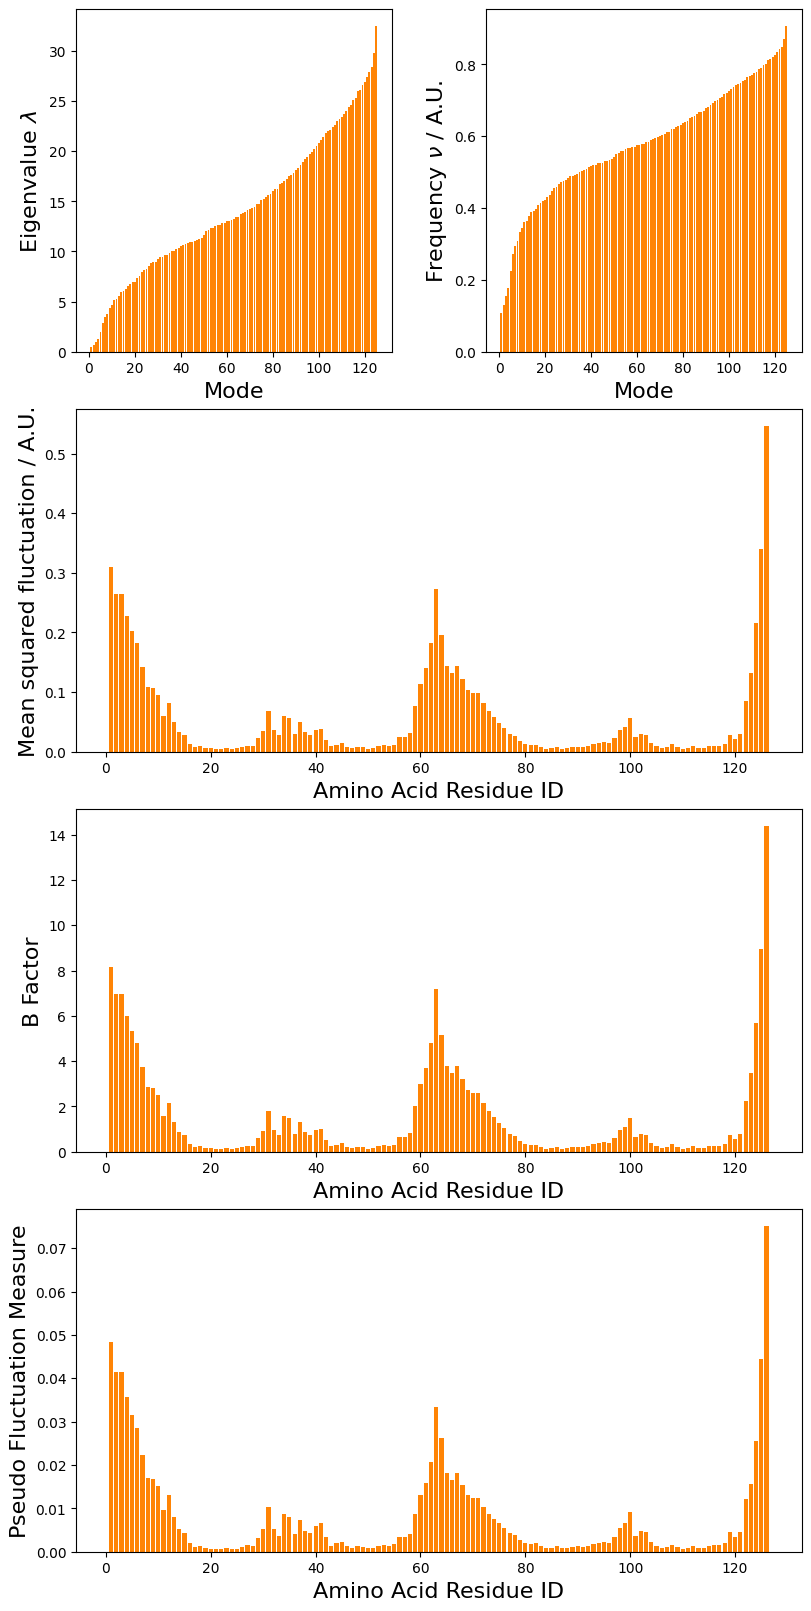

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import springcraft

gnm = calculate_normal_modes_gnm_from_id("1A0A", 10.0)
eigenval, eigenvec = gnm.eigen() 

pseudo_fluc = pseudo_fluctuation_measure(eigenval, eigenvec, 10, lambda x: 1/x)
msqf = gnm.mean_square_fluctuation(mode_subset = np.array([i for i in range(1, 10)]))
bfact = gnm.bfactor(mode_subset = np.array([i for i in range(1, 10)]))
freq = gnm.frequencies()[1:]

eigenval = eigenval[1:]
fig = plt.figure(figsize=(8.0, 16.0), constrained_layout=True)
grid = fig.add_gridspec(nrows=4, ncols=2)

ax00 = fig.add_subplot(grid[0, 0])
ax01 = fig.add_subplot(grid[0, 1])
ax1 = fig.add_subplot(grid[1, :])
ax2 = fig.add_subplot(grid[2, :])
ax3 = fig.add_subplot(grid[3, :])

biotite_c = biotite.colors["orange"]

ax00.bar(x=np.arange(1, len(eigenval)+1), height=eigenval, color=biotite_c)
ax01.bar(x=np.arange(1, len(freq)+1), height=freq, color=biotite_c)
ax1.bar(x=np.arange(1, len(msqf)+1), height=msqf, color=biotite_c)
ax2.bar(x=np.arange(1, len(bfact)+1), height=bfact, color=biotite_c)
ax3.bar(x=np.arange(1, len(pseudo_fluc)+1), height=pseudo_fluc, color=biotite_c)

ax00.set_xlabel("Mode", size=16)
ax00.set_ylabel(r"Eigenvalue $\lambda$", size=16)
ax01.set_xlabel("Mode", size=16)
ax01.set_ylabel(r"Frequency $\nu$ / A.U.", size=16)
ax1.set_xlabel("Amino Acid Residue ID", size=16)
ax1.set_ylabel("Mean squared fluctuation / A.U.", size=16)
ax2.set_xlabel("Amino Acid Residue ID", size=16)
ax2.set_ylabel("B Factor", size=16)
ax3.set_xlabel("Amino Acid Residue ID", size=16)
ax3.set_ylabel("Pseudo Fluctuation Measure", size=16)

plt.show()